# Regresión lineal

<p style="text-align: justify; font-size: 1.1rem">La regresión lineal es un algoritmo básico de Machine Learning que nos permite crear un modelo, en base a ciertos datos, para poder realziar predicciones. Para obtener más información detallada de la regresión lineal, se puede revisar la carpeta "maths-for-AI", y dentro de ella las clases de Vectores y Matrices.</p>

<div style="text-align: justify; font-size: 1.1rem">

El código ejercitado aquí corresponde casi en su totalidad (excepto la parte de "Regresión lineal usando fórmula") al curso de data science de Frank Andrade de Youtube, como así también las capturas de pantalla sintéticas de la regresión lineal.

Link al curso: <a href="https://www.youtube.com/watch?v=zAIWnwqHGok" target="_blank">Curso Data Science - Frank Andrade</a>
</div>

![image1](./images/image14.png)

![image2](./images/image15.png)

<p style="text-align: justify; font-size: 1.1rem">Para este ejemplo, en el que usaremos unos datos que importaremos con pandas, practicaremos ambos tipos de regresión lineal: simple (1 variable indep y 1 variable dep), y múltiple (más de 1 variable indep y 1 variable dep). Además, usaremos como ejemplo distintas libreías y herramientas.</p>

In [63]:
import numpy as np
from numpy import linalg as LA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<div style="text-align: justify; font-size: 1.1rem">

Los datos del siguiente dataset representan:
* Rooms: cant de habitaciones de la casa <br>
* Distance: distancia respecto a los centros <br>
* Value: valor de la casa en miles de dolares <br>
<br>

Para la regresión lineal simple, utilizaremos:
* Rooms - variable independiente <br>
* Value - variable dependiente <br>
<br>

Para la regresión lineal múltiple, usaremos:
* Rooms - variable independiente 1 <br>
* Distance - variable independiente 2 <br>
* Value - variable dependiente
</div>

In [5]:
df_boston = pd.read_csv("./datasets/Boston House Prices.csv")
df_boston

,Rooms,Distance,Value
0,6.575,4.0900,24.0
1,6.421,4.9671,21.6
2,7.185,4.9671,34.7
3,6.998,6.0622,33.4
4,7.147,6.0622,36.2
...,...,...,...
501,6.593,2.4786,22.4
502,6.120,2.2875,20.6
503,6.976,2.1675,23.9
504,6.794,2.3889,22.0


## Regresión lineal con Statsmodels

In [6]:
import statsmodels.api as sm

### Regresión Lineal Simple

In [8]:
# definir las variables dependientes e independientes
y = df_boston["Value"]
x = df_boston["Rooms"]

<Axes: xlabel='Rooms', ylabel='Value'>

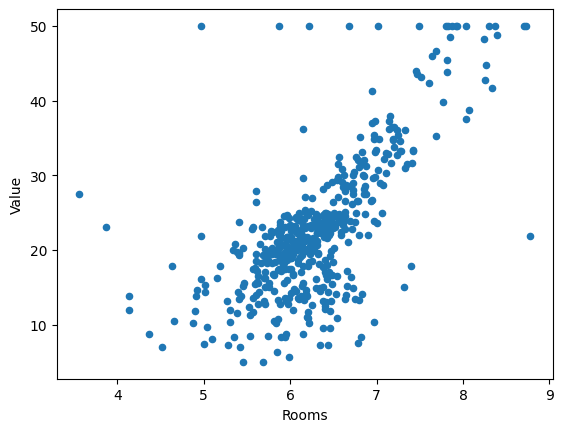

In [10]:
# explorar el dataset (por medio de un grafico realizado con pandas)
df_boston.plot(kind="scatter", x="Rooms", y ="Value")

In [11]:
# crear la regresión: agregar constante (b0 u ordenada al origen de la ecuacion) y ajustar modelo
x = sm.add_constant(x) # a la serie que incluye los valores de la variable indep, statsmodels le agrega una columna de unos
print(x)

# se ajusta y obtiene el modelo, es decir, se consigue el modelo con los minimos cuadrados ordinarios (para que el error sea el menor posible)
lm = sm.OLS(y, x).fit()
print(lm)

     const  Rooms
0      1.0  6.575
1      1.0  6.421
2      1.0  7.185
3      1.0  6.998
4      1.0  7.147
..     ...    ...
501    1.0  6.593
502    1.0  6.120
503    1.0  6.976
504    1.0  6.794
505    1.0  6.030

[506 rows x 2 columns]


In [12]:
lm.predict(x) # con esto, predeciriamos el valor de las casas a partir de valores de la variable indep

0      25.175746
1      23.774021
2      30.728032
3      29.025938
4      30.382152
         ...    
501    25.339584
502    21.034286
503    28.825691
504    27.169108
505    20.215096
Length: 506, dtype: float64

In [13]:
# tabla de regresion (para saber que tan bien predice nuestro modelo)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 18 Feb 2024   Prob (F-statistic):           2.49e-74
Time:                        16:40:08   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
Rooms          9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div style="text-align: justify; font-size: 1.1rem;">

Análisis de algunos valores importantes de la **Tabla de Regresión**

Primera tabla:
* Dep. Variable: representa cuál es nuestra variable dependiente (en el caso de nuestro dataset, es la columna "Value")
* Method: método utilzado para generar el modelo, en este caso el de los mínimos cuadrados
* R - squared: cuanto más cercano está a 1 este valor, mejor predice nuestro modelo

Segunda tabla:
* const (coef): valor de nuestra constante b0 de la ecuación lineal
* Rooms (coef): valor del coeficiente de x de la ecuación lineal

Estos dos últimos valores son los que necesitaremos para generar la ecuación lineal de la regresión lineal simple
</div>

In [19]:
# Ecuacion de la regresion lineal
# Coef Rooms (a): 9.1021
# Coef Constante (b): -34.6706

# Ecuacion lineal: y = ax + b

print(lm.params)
print(type(lm.params))
b = lm.params.iloc[0]
a = lm.params.iloc[1]

y_pred = a * x["Rooms"] + b

const   -34.670621
Rooms     9.102109
dtype: float64
<class 'pandas.core.series.Series'>


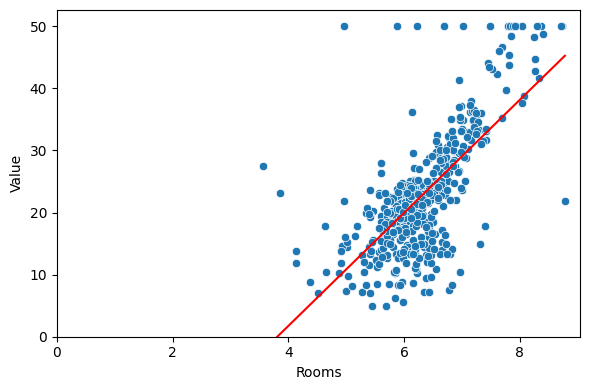

In [33]:
# Grafica de la regresion lineal

# graficar los puntos
plt.figure(figsize=(6, 4), tight_layout=True)
sns.scatterplot(x=x["Rooms"], y=y) # nube de puntos de las observaciones reales

# graficar la linea de nuestra prediccion
sns.lineplot(x=x["Rooms"], y=y_pred, color="red")

# axis
plt.xlim(0)
plt.ylim(0)
plt.savefig("simple_linear_regression")
plt.show()

### Regresión Lineal Múltiple

In [22]:
df_boston

,Rooms,Distance,Value
0,6.575,4.0900,24.0
1,6.421,4.9671,21.6
2,7.185,4.9671,34.7
3,6.998,6.0622,33.4
4,7.147,6.0622,36.2
...,...,...,...
501,6.593,2.4786,22.4
502,6.120,2.2875,20.6
503,6.976,2.1675,23.9
504,6.794,2.3889,22.0


In [25]:
# Definir las variables dependientes e independientes
y = df_boston["Value"]
X = df_boston[["Rooms", "Distance"]]

In [27]:
# crear la regresion: agregar constante y ajustar modelo
X = sm.add_constant(X)
print(X)

multiple_lm = sm.OLS(y, X).fit()

     const  Rooms  Distance
0      1.0  6.575    4.0900
1      1.0  6.421    4.9671
2      1.0  7.185    4.9671
3      1.0  6.998    6.0622
4      1.0  7.147    6.0622
..     ...    ...       ...
501    1.0  6.593    2.4786
502    1.0  6.120    2.2875
503    1.0  6.976    2.1675
504    1.0  6.794    2.3889
505    1.0  6.030    2.5050

[506 rows x 3 columns]


In [36]:
multiple_lm.predict(X)

0      25.232623
1      24.305975
2      31.030253
3      29.919727
4      31.231138
         ...    
501    24.603318
502    20.346831
503    27.822178
504    26.328552
505    19.661029
Length: 506, dtype: float64

In [37]:
multiple_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     247.0
Date:                Sun, 18 Feb 2024   Prob (F-statistic):           1.84e-75
Time:                        17:17:58   Log-Likelihood:                -1667.1
No. Observations:                 506   AIC:                             3340.
Df Residuals:                     503   BIC:                             3353.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6361      2.621    -13.212      0.000     -39.786     -29.486
Rooms          8.8014      0.424     20.780      0.000       7.969       9.634
Distance       0.4888      0.141      3.459      0.001       0.211       0.767
==============================================================================
Omnibus:                      142.807   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              844.520
Skew:                           1.090   Prob(JB):                    4.12e-184
Kurtosis:                       8.942   Cond. No.                         68.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# Ecuacion de la regresion lineal
# Coef Rooms (a1): 8.8014
# Coef Distance (a2): 0.4888 	
# Coef Constante (b): -34.6361

# Ecuacion lineal: y = a1x1 + a2x2 + b

print(multiple_lm.params)
print(type(multiple_lm.params))

b = multiple_lm.params.iloc[0]
a1 = multiple_lm.params.iloc[1]
a2 = multiple_lm.params.iloc[2]

mult_y_pred = a1 * x["Rooms"] + a2 * x["Distance"] + b

const      -34.636050
Rooms        8.801412
Distance     0.488849
dtype: float64
<class 'pandas.core.series.Series'>


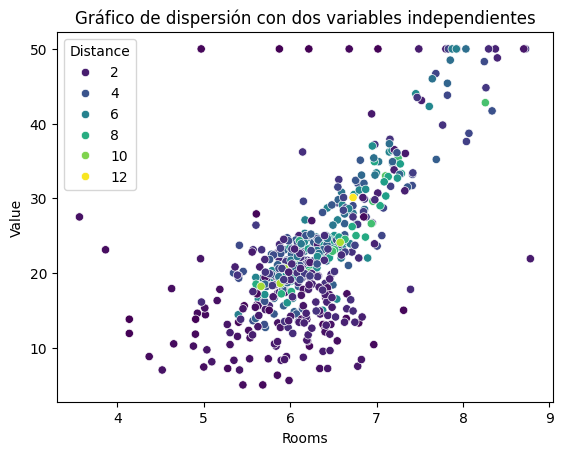

In [39]:
# Grafica de la regresion lineal

# graficar los puntos
sns.scatterplot(x='Rooms', y='Value', data=df_boston, hue='Distance', palette='viridis')
plt.title('Gráfico de dispersión con dos variables independientes')
plt.show()

[]

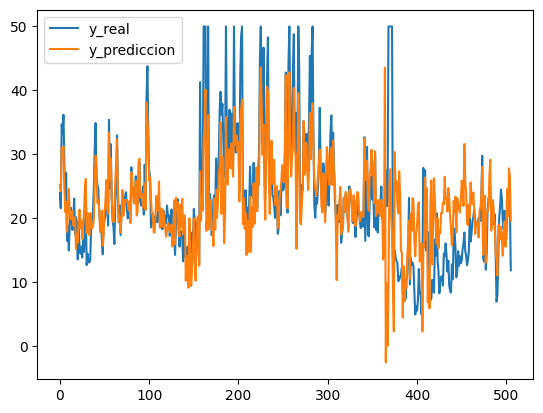

In [42]:
plt.plot(y, label="y_real")
plt.plot(mult_y_pred, label="y_prediccion")
plt.legend()
plt.savefig("multiple_linear_regression")
plt.plot() 

## Regresión lineal con sklearn

<div style="text-align: justify; font-size: 1.1rem;">

scikitlearn es la librería estándar de Python para Machine Learning. Nos permite realizar regresiones lineales simples y múltiples.
</div>

In [44]:
from sklearn import linear_model

### Regresión lineal múltiple

In [45]:
# definir las variables dependientes e independientes
y = df_boston["Value"]
X = df_boston[["Rooms", "Distance"]]

In [47]:
# ajustar el modelo
# no hace falta agregar la constante, ya que sckitlearn lo hace automaticamente)
slm = linear_model.LinearRegression()
slm.fit(X, y)

LinearRegression()

In [49]:
# predecir valores
slm.predict(X)[:5]

array([25.23262311, 24.30597474, 31.03025338, 29.9197274 , 31.23113776])

In [50]:
# r-squared: score
slm.score(X, y)

0.4955246476058477

In [52]:
# coeficientes de cada variable independiente
slm.coef_

array([8.80141183, 0.48884854])

In [54]:
# interceptor o constante b
slm.intercept_

-34.636050175473315

## Regresión lineal usando fórmula

<p style="text-align: justify; font-size: 1.1rem;">Esta última parte es para comparar los resultados de la constante y los coeficientes usando las librerías con respecto a hacerlo de forma más "manual" usando las fórmulas</p>

### Regresión lineal simple

In [58]:
# definimos las variables dependientes e independientes
x = df_boston["Rooms"].to_numpy()
print(x.shape)
y = df_boston["Value"].to_numpy()
print(y.shape)

(506,)
(506,)
6.284634387351779


In [59]:
# Ecuacion lineal: y = ax + b
numerador = (x - x.mean()) @ (y - y.mean()) # se usa broadcasting
denominador = (x - x.mean()) @ (x - x.mean())
a = numerador / denominador
print(a)
b = y.mean() - a * x.mean()
print(b)

9.10210898118031
-34.67062077643857


### Regresión lineal múltiple

In [62]:
X = df_boston[["Rooms", "Distance"]].to_numpy()
y = df_boston["Value"].to_numpy()

In [64]:
rows,_ = X.shape # Obtengo las filas y columnas
X = np.c_[ np.ones(rows), X ] 

coeficients_and_constant = LA.inv(X.T @ X) @ X.T @ y
coeficients_and_constant

array([3.35378618, 0.49596792])

Vemos que llegamos a similares/iguales resultados con las tres alternativas